## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [25]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [26]:
train, test = keras.datasets.cifar10.load_data()

In [27]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [28]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [29]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [30]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [2, 16, 32, 128, 256, 1024]
MOMENTUM = 0.95

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_10 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_11 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_12 (Batc (None, 128)               512 

In [24]:
batch_size = BATCH_SIZE[0]
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

    # Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_7 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_8 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_9 (Batch (None, 128)               512 

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

print('Batch size = %s' % batch_size)

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [ ]:
batch_size = BATCH_SIZE[1]
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=batch_size,
          validation_data=(x_test, y_test),
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

In [ ]:
print('Batch size = %s' % batch_size)

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [43]:
batch_size = BATCH_SIZE[2]
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=batch_size,
          validation_data=(x_test, y_test),
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 15s 302us/step - loss: 1.6990 - accuracy: 0.4531 - val_loss: 1.6800 - val_accuracy: 0.4309
Epoch 2/50
50000/50000 [==============================] - 14s 289us/step - loss: 1.3648 - accuracy: 0.5215 - val_loss: 1.8079 - val_accuracy: 0.4105
Epoch 3/50
50000/50000 [==============================] - 14s 289us/step - loss: 1.3221 - accuracy: 0.5350 - val_loss: 1.9515 - val_accuracy: 0.3728
Epoch 4/50
50000/50000 [==============================] - 15s 291us/step - loss: 1.2812 - accuracy: 0.5456 - val_loss: 1.7862 - val_accuracy: 0.4322
Epoch 5/50
50000/50000 [==============================] - 15s 305us/step - loss: 1.2279 - accuracy: 0.5626 - val_loss: 1.8954 - val_accuracy: 0.3939
Epoch 6/50
50000/50000 [==============================] - 17s 333us/step - loss: 1.2128 - accuracy: 0.5681 - val_loss: 1.5331 - val_accuracy: 0.4629
Epoch 7/50
50000/50000 [==============================] 

Batch size = 32


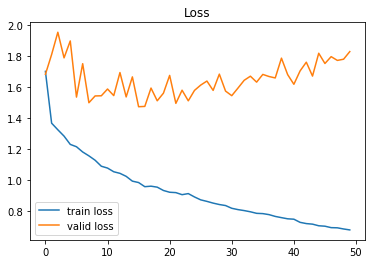

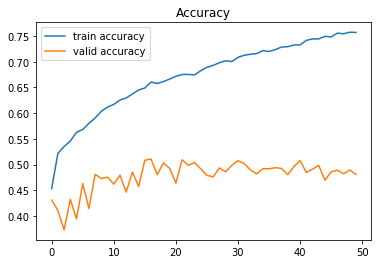

In [44]:
print('Batch size = %s' % batch_size)

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [41]:
batch_size = BATCH_SIZE[3]
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=batch_size,
          validation_data=(x_test, y_test),
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 10s 197us/step - loss: 1.0803 - accuracy: 0.6756 - val_loss: 3.2990 - val_accuracy: 0.3396
Epoch 2/50
50000/50000 [==============================] - 9s 183us/step - loss: 0.9594 - accuracy: 0.6727 - val_loss: 3.0028 - val_accuracy: 0.3605
Epoch 3/50
50000/50000 [==============================] - 9s 182us/step - loss: 0.8046 - accuracy: 0.7156 - val_loss: 2.9288 - val_accuracy: 0.3749
Epoch 4/50
50000/50000 [==============================] - 9s 184us/step - loss: 0.7212 - accuracy: 0.7411 - val_loss: 2.3379 - val_accuracy: 0.4204
Epoch 5/50
50000/50000 [==============================] - 9s 183us/step - loss: 0.6446 - accuracy: 0.7675 - val_loss: 2.5141 - val_accuracy: 0.4048
Epoch 6/50
50000/50000 [==============================] - 9s 186us/step - loss: 0.5980 - accuracy: 0.7857 - val_loss: 2.6472 - val_accuracy: 0.4018
Epoch 7/50
50000/50000 [==============================] - 9s 

Batch size = 128


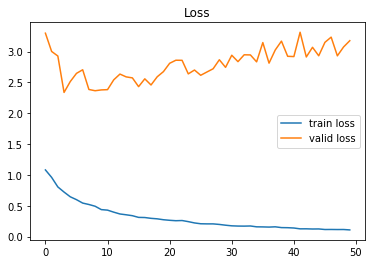

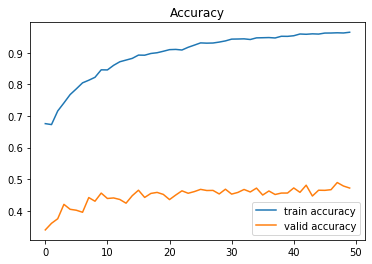

In [42]:
print('Batch size = %s' % batch_size)

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [39]:
batch_size = BATCH_SIZE[4]
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=batch_size,
          validation_data=(x_test, y_test),
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.5744 - accuracy: 0.5554 - val_loss: 3.0386 - val_accuracy: 0.3440
Epoch 2/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.3582 - accuracy: 0.5333 - val_loss: 1.8317 - val_accuracy: 0.4245
Epoch 3/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.1944 - accuracy: 0.5841 - val_loss: 1.9195 - val_accuracy: 0.4188
Epoch 4/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.0962 - accuracy: 0.6169 - val_loss: 1.9155 - val_accuracy: 0.4225
Epoch 5/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.0141 - accuracy: 0.6450 - val_loss: 2.0878 - val_accuracy: 0.4149
Epoch 6/50
50000/50000 [==============================] - 6s 123us/step - loss: 0.9476 - accuracy: 0.6670 - val_loss: 2.0050 - val_accuracy: 0.4162
Epoch 7/50
50000/50000 [==============================] - 6s 1

Batch size = 256


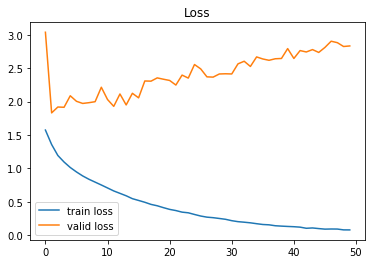

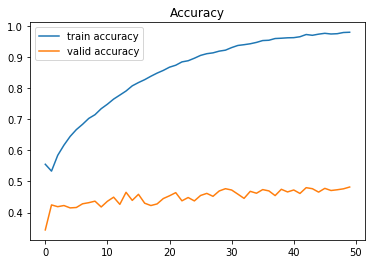

In [40]:
print('Batch size = %s' % batch_size)

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [31]:
batch_size = BATCH_SIZE[5]
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=batch_size,
          validation_data=(x_test, y_test),
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 160us/step - loss: 2.2039 - accuracy: 0.2684 - val_loss: 2.1084 - val_accuracy: 0.2072
Epoch 2/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.7377 - accuracy: 0.3956 - val_loss: 1.9691 - val_accuracy: 0.3092
Epoch 3/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.6108 - accuracy: 0.4372 - val_loss: 1.8220 - val_accuracy: 0.3742
Epoch 4/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.5395 - accuracy: 0.4630 - val_loss: 1.7100 - val_accuracy: 0.4148
Epoch 5/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.4834 - accuracy: 0.4796 - val_loss: 1.6304 - val_accuracy: 0.4281
Epoch 6/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.4387 - accuracy: 0.4959 - val_loss: 1.5857 - val_accuracy: 0.4399
Epoch 7/50
50000/50000 [==============================] - 5s 94u

Batch size = 1024


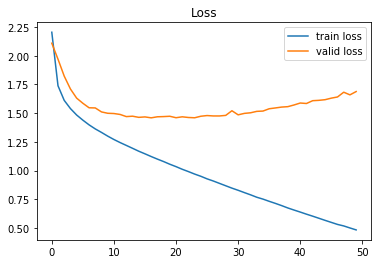

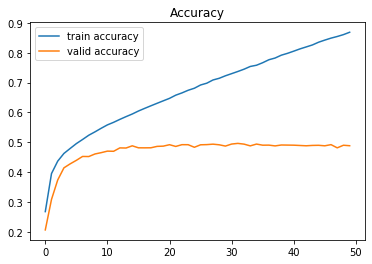

In [32]:
print('Batch size = %s' % batch_size)

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [33]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = BatchNormalization()(x)
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = BatchNormalization()(x)
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [34]:
batch_size = BATCH_SIZE[5]
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=batch_size,
          validation_data=(x_test, y_test),
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 93us/step - loss: 0.4667 - accuracy: 0.8747 - val_loss: 1.7107 - val_accuracy: 0.4868
Epoch 2/50
50000/50000 [==============================] - 5s 96us/step - loss: 0.4526 - accuracy: 0.8808 - val_loss: 1.7197 - val_accuracy: 0.4884
Epoch 3/50
50000/50000 [==============================] - 5s 92us/step - loss: 0.4401 - accuracy: 0.8849 - val_loss: 1.7173 - val_accuracy: 0.4888
Epoch 4/50
50000/50000 [==============================] - 5s 91us/step - loss: 0.4230 - accuracy: 0.8895 - val_loss: 1.7414 - val_accuracy: 0.4833
Epoch 5/50
50000/50000 [==============================] - 4s 88us/step - loss: 0.4086 - accuracy: 0.8956 - val_loss: 1.7504 - val_accuracy: 0.4853
Epoch 6/50
50000/50000 [==============================] - 4s 90us/step - loss: 0.3942 - accuracy: 0.9031 - val_loss: 1.7550 - val_accuracy: 0.4872
Epoch 7/50
50000/50000 [==============================] - 5s 94us/st

Batch Normalization Before Activation


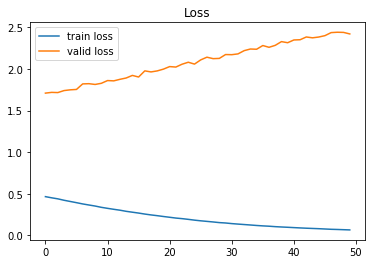

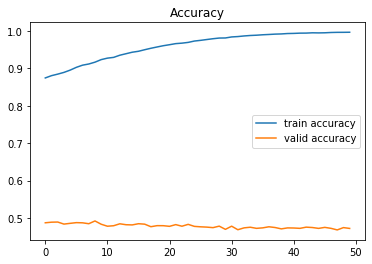

In [35]:
print('Batch Normalization Before Activation')

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [36]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    input_layer = BatchNormalization()(input_layer)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [37]:
batch_size = BATCH_SIZE[5]
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=batch_size,
          validation_data=(x_test, y_test),
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 90us/step - loss: 0.0637 - accuracy: 0.9977 - val_loss: 2.4684 - val_accuracy: 0.4716
Epoch 2/50
50000/50000 [==============================] - 4s 89us/step - loss: 0.0622 - accuracy: 0.9977 - val_loss: 2.4674 - val_accuracy: 0.4680
Epoch 3/50
50000/50000 [==============================] - 4s 90us/step - loss: 0.0595 - accuracy: 0.9981 - val_loss: 2.5054 - val_accuracy: 0.4752
Epoch 4/50
50000/50000 [==============================] - 4s 88us/step - loss: 0.0575 - accuracy: 0.9981 - val_loss: 2.4947 - val_accuracy: 0.4738
Epoch 5/50
50000/50000 [==============================] - 4s 90us/step - loss: 0.0558 - accuracy: 0.9985 - val_loss: 2.5054 - val_accuracy: 0.4717
Epoch 6/50
50000/50000 [==============================] - 4s 89us/step - loss: 0.0537 - accuracy: 0.9987 - val_loss: 2.5020 - val_accuracy: 0.4708
Epoch 7/50
50000/50000 [==============================] - 4s 89us/st

Batch Normalization After Input Layer


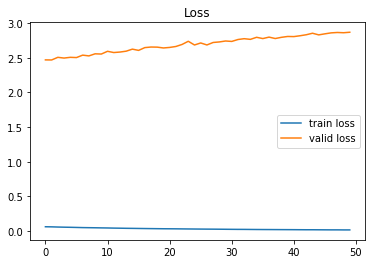

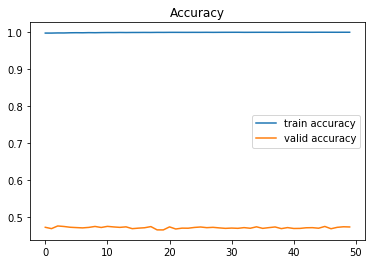

In [38]:
print('Batch Normalization After Input Layer')

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()